# 💜 Breaking Barriers: Women's Rights Data Dashboard
This analysis explores how economic development and social factors shape women's health outcomes across countries — focusing on fertility rate, child mortality, and GDP per capita.

Despite global advancements, child mortality, fertility rates, and economic disparities remain critical challenges, especially across developing nations. Understanding these factors through data-driven insights is essential for targeting global health, social welfare policies, and gender equality initiatives.

This dashboard explores:

Top 10 Countries by Fertility Rate
GDP per Capita vs Child Mortality Rate (Smoothed Line Chart with Outliers Removed)
Child Mortality Trends Over Time for Selected Countries
Global Distribution of Mortality Rates (Globe Map Visualisation)
The objective is to visually communicate how these key health and economic indicators interact and to highlight areas where global interventions are most needed.

## 📂 Step 1: Install Required Libraries

In [ ]:
!pip install pandas plotnine geopandas matplotlib

In [ ]:
!sudo apt install font-manager
!sudo apt-get install fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 📁 Step 2: Upload Your CSV Files

Use the left-side **Files tab (📂)** in Colab and upload these files manually:
- `unicef_indicator_1.csv`
- `unicef_metadata.csv`

## 🔄 Step 3: Import Libraries

In [3]:
import pandas as pd
from plotnine import *
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## 📄 Step 4: Confirm Uploaded Files

In [4]:
!ls /content/

sample_data


## 📊 Step 5: Load CSV Files Correctly

In [6]:
indicator1 = pd.read_csv('/content/unicef_indicator_1.csv')
metadata = pd.read_csv('/content/unicef_metadata.csv')

indicator1 = indicator1.drop(columns=['Unnamed: 0'], errors='ignore')
metadata = metadata.drop(columns=['Unnamed: 0'], errors='ignore')

metadata.head(20)

,country,alpha_2_code,alpha_3_code,numeric_code,year,"population,_total",gdp_per_capita_(constant_2015_us$),gni_(current_us$),"inflation,_consumer_prices_(annual_%)","life_expectancy_at_birth,_total_(years)",military_expenditure_(%_of_gdp),fossil_fuel_energy_consumption_(%_of_total),gdp_growth_(annual_%),"birth_rate,_crude_(per_1,000_people)","hospital_beds_(per_1,000_people)"
0,Afghanistan,AF,AFG,4,1960,9035043.0,NaN,5.488888e+08,NaN,32.535,NaN,NaN,NaN,50.340,0.170627
1,Afghanistan,AF,AFG,4,1961,9214083.0,NaN,5.600000e+08,NaN,33.068,NaN,NaN,NaN,50.443,NaN
2,Afghanistan,AF,AFG,4,1962,9404406.0,NaN,5.577778e+08,NaN,33.547,NaN,NaN,NaN,50.570,NaN
3,Afghanistan,AF,AFG,4,1963,9604487.0,NaN,7.666667e+08,NaN,34.016,NaN,NaN,NaN,50.703,NaN
4,Afghanistan,AF,AFG,4,1964,9814318.0,NaN,8.155556e+08,NaN,34.494,NaN,NaN,NaN,50.831,NaN
5,Afghanistan,AF,AFG,4,1965,10036008.0,NaN,1.026667e+09,NaN,34.953,NaN,NaN,NaN,50.872,NaN
6,Afghanistan,AF,AFG,4,1966,10266395.0,NaN,1.428889e+09,NaN,35.453,NaN,NaN,NaN,50.986,NaN
7,Afghanistan,AF,AFG,4,1967,10505959.0,NaN,1.708889e+09,NaN,35.924,NaN,NaN,NaN,51.081,NaN
8,Afghanistan,AF,AFG,4,1968,10756922.0,NaN,1.402222e+09,NaN,36.418,NaN,NaN,NaN,51.148,NaN
9,Afghanistan,AF,AFG,4,1969,11017409.0,NaN,1.437778e+09,NaN,36.910,NaN,NaN,NaN,51.195,NaN


## 🔁 Step 6: Merge Data on 'country' Column

In [7]:
merged_data = pd.merge(indicator1, metadata, on='country', how='left')
merged_data.head()

,country,alpha_2_code_x,alpha_3_code_x,numeric_code_x,indicator,time_period,obs_value,sex,unit_of_measure,observation_status,...,"population,_total",gdp_per_capita_(constant_2015_us$),gni_(current_us$),"inflation,_consumer_prices_(annual_%)","life_expectancy_at_birth,_total_(years)",military_expenditure_(%_of_gdp),fossil_fuel_energy_consumption_(%_of_total),gdp_growth_(annual_%),"birth_rate,_crude_(per_1,000_people)","hospital_beds_(per_1,000_people)"
0,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9035043.0,NaN,5.488888e+08,NaN,32.535,NaN,NaN,NaN,50.340,0.170627
1,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9214083.0,NaN,5.600000e+08,NaN,33.068,NaN,NaN,NaN,50.443,NaN
2,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9404406.0,NaN,5.577778e+08,NaN,33.547,NaN,NaN,NaN,50.570,NaN
3,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9604487.0,NaN,7.666667e+08,NaN,34.016,NaN,NaN,NaN,50.703,NaN
4,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9814318.0,NaN,8.155556e+08,NaN,34.494,NaN,NaN,NaN,50.831,NaN


## 🔧 Step 7: Rename Columns for Plotting

In [8]:
merged_data = merged_data.rename(columns={
    'obs_value': 'MortalityRate',
    'birth_rate,_crude_(per_1,000_people)': 'FertilityRate',
    'gdp_per_capita_(constant_2015_us$)': 'GDPperCapita',
    'time_period': 'Year'
})
merged_data.head()

,country,alpha_2_code_x,alpha_3_code_x,numeric_code_x,indicator,Year,MortalityRate,sex,unit_of_measure,observation_status,...,"population,_total",GDPperCapita,gni_(current_us$),"inflation,_consumer_prices_(annual_%)","life_expectancy_at_birth,_total_(years)",military_expenditure_(%_of_gdp),fossil_fuel_energy_consumption_(%_of_total),gdp_growth_(annual_%),FertilityRate,"hospital_beds_(per_1,000_people)"
0,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9035043.0,NaN,5.488888e+08,NaN,32.535,NaN,NaN,NaN,50.340,0.170627
1,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9214083.0,NaN,5.600000e+08,NaN,33.068,NaN,NaN,NaN,50.443,NaN
2,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9404406.0,NaN,5.577778e+08,NaN,33.547,NaN,NaN,NaN,50.570,NaN
3,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9604487.0,NaN,7.666667e+08,NaN,34.016,NaN,NaN,NaN,50.703,NaN
4,Afghanistan,AF,AFG,4,Percentage of women aged 20 to 24 years who we...,1998,15.7,Total,%,Reported,...,9814318.0,NaN,8.155556e+08,NaN,34.494,NaN,NaN,NaN,50.831,NaN


**📊 Bar Chart: Top 10 Countries by Fertility Rate**

The bar chart presents the top 10 countries with the highest average fertility rates. A higher fertility rate is often associated with limited access to healthcare, education, and reproductive services, particularly among women. The visualisation highlights how certain countries, predominantly from sub-Saharan Africa, face these challenges at a larger scale.

Key Insight: The countries at the top of the fertility rate chart represent regions where women's rights and healthcare access need urgent attention.

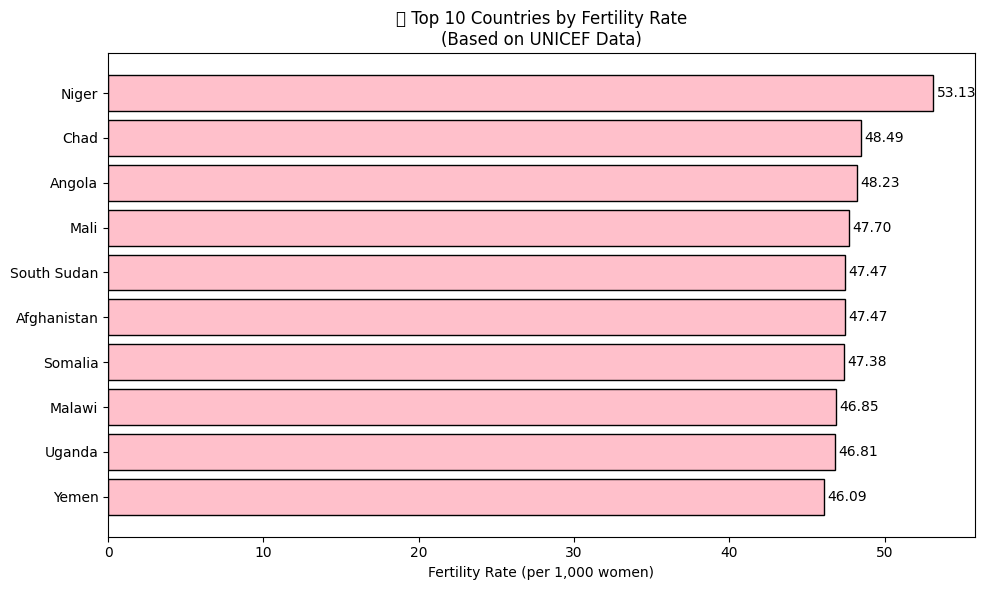

In [9]:
# Filter out rows with missing FertilityRate
clean_data = merged_data.dropna(subset=['FertilityRate'])

fertility_grouped = clean_data.groupby('country')['FertilityRate'].mean().reset_index()

# Sort by FertilityRate and select the top 10
top10_grouped = fertility_grouped.sort_values('FertilityRate', ascending=False).head(10)

# Get top 10 countries by FertilityRate
#top10 = clean_data.sort_values('FertilityRate', ascending=False).head(10)
#print(top10_grouped)
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_grouped['country'], top10_grouped['FertilityRate'], color='pink', edgecolor='black')

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center', fontsize=10, color='black')

plt.xlabel('Fertility Rate (per 1,000 women)')
plt.title('🌍 Top 10 Countries by Fertility Rate\n(Based on UNICEF Data)')
plt.gca().invert_yaxis()  # Highest bar on top
plt.tight_layout()
plt.show()


**📈 Smoothed Line Chart: GDP per Capita vs Child Mortality Rate**


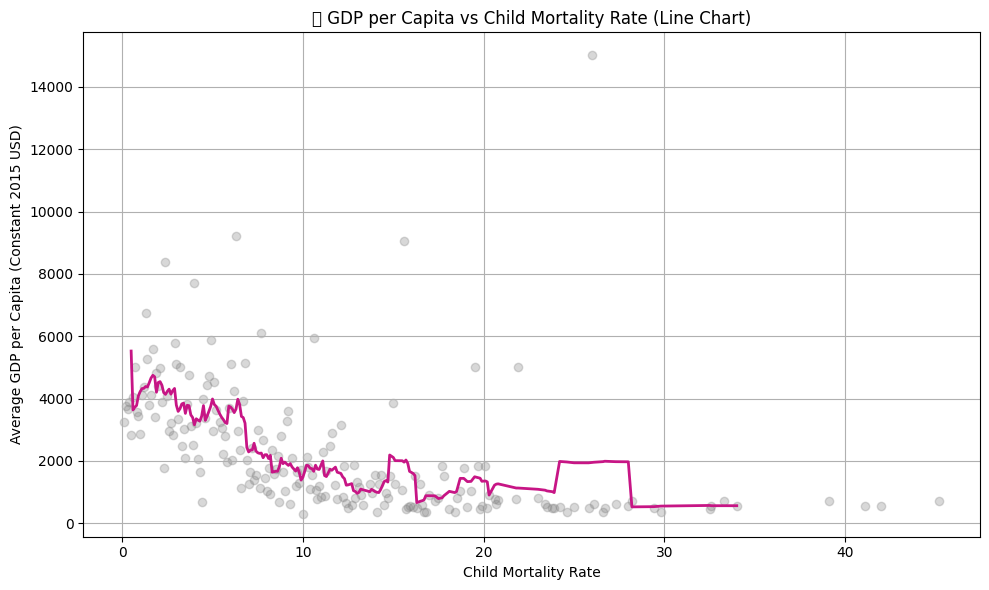

In [10]:

# Drop missing values for MortalityRate and GDPperCapita
line_data = merged_data.dropna(subset=['MortalityRate', 'GDPperCapita'])

# Group by MortalityRate and calculate the average GDPperCapita
grouped_line_data = line_data.groupby('MortalityRate')['GDPperCapita'].mean().reset_index()

# Sort values to ensure the line chart connects points in order
grouped_line_data = grouped_line_data.sort_values('MortalityRate')

# Apply Moving Average (window = 5 for smoothness)
grouped_line_data['Smoothed_GDP'] = grouped_line_data['GDPperCapita'].rolling(window=10, center=True).mean()

grouped_line_data = grouped_line_data.iloc[1:].reset_index(drop=True)

# Plot Smoothed Line Chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_line_data['MortalityRate'], grouped_line_data['Smoothed_GDP'],
         linestyle='-', color='mediumvioletred', label='Smoothed GDP per Capita', linewidth=2)
plt.scatter(grouped_line_data['MortalityRate'], grouped_line_data['GDPperCapita'],
            alpha=0.3, color='gray', label='Original Data Points')

plt.xlabel('Child Mortality Rate')
plt.ylabel('Average GDP per Capita (Constant 2015 USD)')
plt.title('📈 GDP per Capita vs Child Mortality Rate (Line Chart)')
plt.grid(True)
plt.tight_layout()
plt.show()


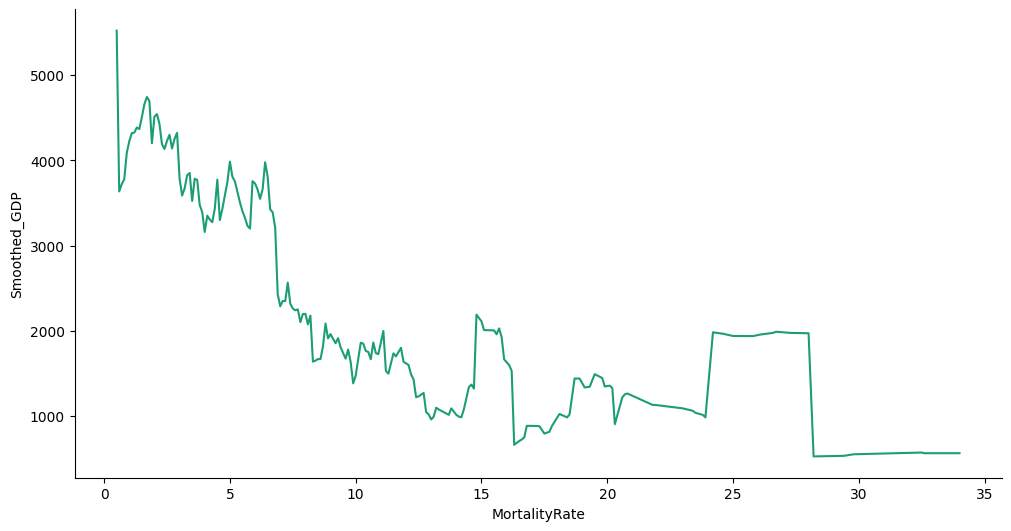

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MortalityRate']
  ys = series['Smoothed_GDP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = grouped_line_data.sort_values('MortalityRate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MortalityRate')
_ = plt.ylabel('Smoothed_GDP')

The smoothed line chart demonstrates the relationship between Child Mortality Rate (x-axis) and GDP per Capita (y-axis). A rolling average and outlier removal technique were applied to ensure clearer patterns. This analysis shows that as mortality rates increase, GDP per capita generally decreases, reflecting how economic development correlates with health outcomes.

Key Insight: Economic hardship tends to accompany higher child mortality rates. Effective economic strategies can significantly reduce mortality rates by improving healthcare infrastructure and access.

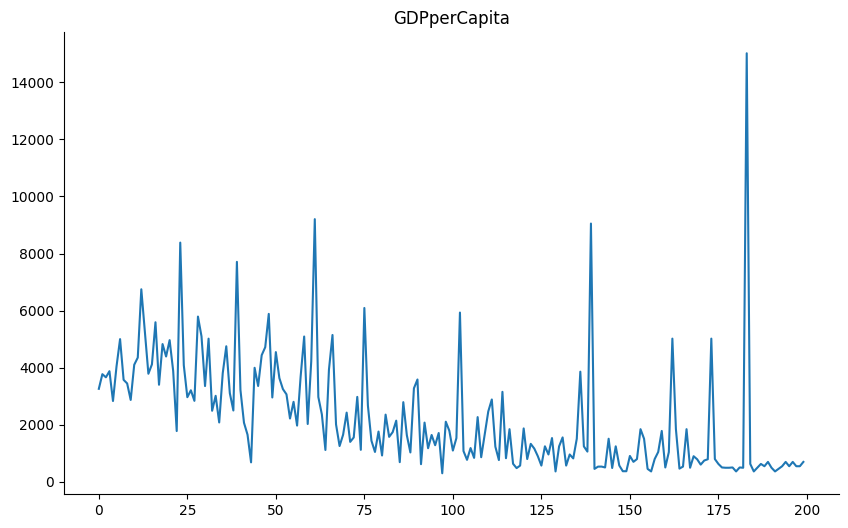

In [12]:
from matplotlib import pyplot as plt
grouped_line_data['GDPperCapita'].plot(kind='line', figsize=(10, 6), title='GDPperCapita')
plt.gca().spines[['top', 'right']].set_visible(False)

## 📈 Time-Series – Mortality Rate Over Time

This line plot displays the child mortality rate trends over time for five selected countries: India, Nigeria, Kenya, Brazil, and Bangladesh. By comparing these countries on the same plot, we can observe improvements or stagnation in health outcomes across regions.

Key Insight: Some countries demonstrate steady progress in reducing child mortality rates, while others show fluctuations or slower improvement. This underlines the importance of sustained health investments and policy interventions.

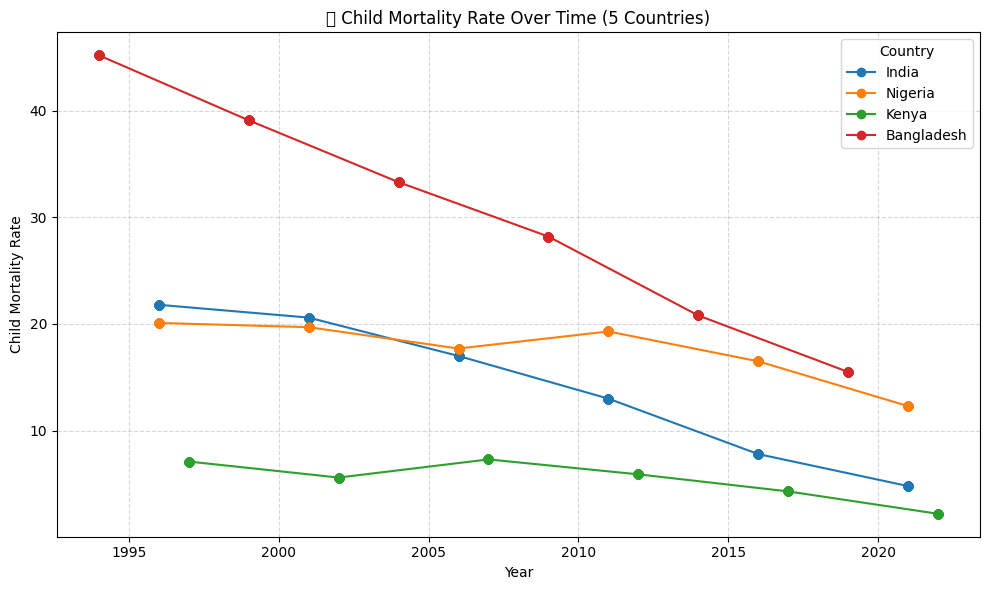

In [13]:
time_series_data = merged_data.dropna(subset=['MortalityRate', 'Year'])

# Select the 5 countries (change these as needed)
selected_countries = ['India', 'Nigeria', 'Kenya', 'Bangladesh']

# Filter data for the selected countries
filtered_time_series = time_series_data[time_series_data['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(10, 6))

# Loop through each country and plot their line
for country in selected_countries:
    country_data = filtered_time_series[filtered_time_series['country'] == country]
    plt.plot(country_data['Year'], country_data['MortalityRate'],
             marker='o', linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Child Mortality Rate')
plt.title('📈 Child Mortality Rate Over Time (5 Countries)')
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**🌍 Globe Map: Average Child Mortality Rate Across the World**

The globe map visualises the global distribution of average child mortality rates by country. Regions with higher mortality rates are prominently highlighted, providing a geographical perspective on areas where healthcare challenges remain severe.

Key Insight: The map reveals hotspots where child health remains critically vulnerable, especially across sub-Saharan Africa and parts of South Asia.

In [15]:
!pip install plotly

import pandas as pd
import plotly.express as px

# Prepare your data: Average Mortality Rate per country
map_data = merged_data.dropna(subset=['MortalityRate'])
map_data_grouped = map_data.groupby('country')['MortalityRate'].mean().reset_index()

# Plotly Choropleth Map
fig = px.choropleth(
    map_data_grouped,
    locations="country",
    locationmode="country names",  # Uses built-in country names
    color="MortalityRate",
    color_continuous_scale="plasma",
    title="🌍 Average Child Mortality Rate Across the World",
    labels={'MortalityRate': 'Child Mortality Rate'}
)

fig.update_layout(
    geo=dict(showframe=False, projection_type='natural earth'),
    title_font_size=20
)

fig.show()


## 📌 Key Metrics Summary

In [16]:
print("🌿 Global Average Fertility Rate:", round(merged_data['FertilityRate'].mean(), 2))
print("🍼 Global Average Mortality Rate:", round(merged_data['MortalityRate'].mean(), 2))
print("👑 Top Country by Fertility Rate:", merged_data.sort_values('FertilityRate', ascending=False).iloc[0]['country'])
print("🛑 Top Country by Mortality Rate:", merged_data.sort_values('MortalityRate', ascending=False).iloc[0]['country'])

🌿 Global Average Fertility Rate: 33.71
🍼 Global Average Mortality Rate: 6.48
👑 Top Country by Fertility Rate: Niger
🛑 Top Country by Mortality Rate: Bangladesh


## ✅ Conclusion

- Fertility rates are highest in low-income regions.
- GDP per capita shows an inverse relationship with child mortality.
- Some regions still face challenges with mortality reduction.

This highlights the need for targeted healthcare and educational policies to ensure equal opportunities for women and children globally.